# Interaktives Beispiel: Isostasieprinzip kontinentale Kruste und ozeanische Kruste

Dieses Jupyter Notebook berechnet die Eindringtiefe von kontinentaler und ozeanischer Kruste bei konstanter Mächtigkeit des kontinentalen Krustenblocks und variierender Mächtigkeit der des ozeanischen Krustenblocks. 
In der ersten Zelle werden die Dichten der Kustenblöcke und des Mantels definiert, sowie die Machtigkeit des kontinentalen Kurstenblocks und der Wassersäule. 

- Führen Sie die Zelle aus, indem sie die Zelle anklicken und dann **strg+enter** drücken, oder den Run-Button in der Menüleiste oben.
- Führen Sie anschließend die zweite Zelle aus. Es erscheint am unteren Ende der Zelle eine Eingabezeile. Tragen Sie dort einen Wert zwischen 1 km und 40 km für die Mächtigkeit der ozeanischen Kruste ein.
- Sie können fortfahren und weitere Werte in das Eingabefeld eingeben.

**Beantworten Sie folgende Fragen:**
- Wie verändert dich die Höhe (height) des kontinentalen Blocks mit zunehmender Mächtigkeit der kontinentalen Kruste?
- Wie beeinflusst die Mächtigkeit der ozeanischen Kruste das Höhen/Tiefen-Verhältnis (height/depth)? Verwenden Sie dafür die Mächtigkeiten von 1 km, 5 km und 20 km!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

rho_air = 1 # kg/m^3
rho_mantle = 3300 # kg/m^3
rho_crust = 2900 # kg/m^3
rho_oc = 3000 # kg/m^3
h_c = 35 # km
h_w = 4 # km
rho_water = 1030 # kg/m^3
print('Done, Move on to the next cell.')

Done, Move on to the next cell.


Please enter the thickness of the oceanic crust between 1 and 40 km
1


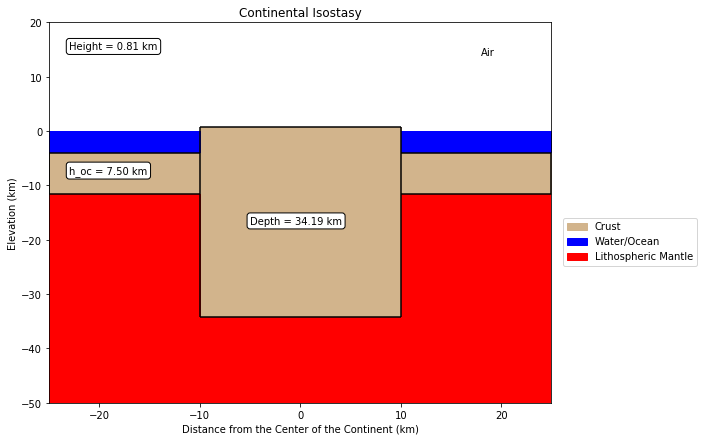

Now plotting a oceanic crust thickness of 1.0 km
You may exit the simulation when ready by entering a number outside the range
Please enter the thickness of the oceanic crust between 1 and 40 km
5
Now plotting a oceanic crust thickness of 5.0 km
You may exit the simulation when ready by entering a number outside the range
Please enter the thickness of the oceanic crust between 1 and 40 km
20
Now plotting a oceanic crust thickness of 20.0 km
You may exit the simulation when ready by entering a number outside the range
Please enter the thickness of the oceanic crust between 1 and 40 km
1
Now plotting a oceanic crust thickness of 1.0 km
You may exit the simulation when ready by entering a number outside the range
Please enter the thickness of the oceanic crust between 1 and 40 km
5
Now plotting a oceanic crust thickness of 5.0 km
You may exit the simulation when ready by entering a number outside the range
Please enter the thickness of the oceanic crust between 1 and 40 km
20
Now plotting

In [2]:
def isostasy(rho_a,rho_m,rho_c,rho_oc,h_c,h_oc,rho_w,h_w):
    h_a = ((h_c*(rho_m - rho_c)) - (h_w*(rho_m - rho_w)) - (h_oc*(rho_m - rho_oc))) / (rho_m - rho_a)
    h_m = h_c - h_oc - h_a - h_w
    return h_a, h_m

print('Please enter the thickness of the oceanic crust between 1 and 40 km')
h_oc = float(input())
while h_oc < 1 or h_oc > 40:
    print('Invalid thickness, enter a number between 1 and 40 km')
    h_oc = float(input())
    
bbox = dict(boxstyle ="round", fc = '1') 

handle = display(None, display_id=True)
fig, ax = plt.subplots(figsize = (9,7))
ax.set_xlim(-25,25)
ax.set_ylim(-50,20)
ax.annotate('Air',(18,14))
ax.set_title('Continental Isostasy')
ax.set_xlabel('Distance from the Center of the Continent (km)')
ax.set_ylabel('Elevation (km)')
while h_oc >= 1 and h_oc <= 40:
    print('Now plotting a oceanic crust thickness of',h_oc,'km')
    h_a,h_m, = isostasy(rho_air,rho_mantle,rho_crust,rho_oc,h_c,h_oc,rho_water,h_w)
    center_crust = ax.fill_betweenx((h_a-h_c,h_a),-10,10,color='tan',label = 'Crust')
    water_right = ax.fill_betweenx((0,-h_w),10,25,color='blue',label = 'Water/Ocean')
    water_left = ax.fill_betweenx((0,-h_w),-25,-10,color='blue')
    o_crust_left = ax.fill_betweenx((-h_w,-h_w-h_oc),-25,-10,color='tan')
    o_crust_right = ax.fill_betweenx((-h_w,-h_w-h_oc),10,25,color='tan')
    mantle_left = ax.fill_betweenx((-h_w-h_oc,-1000),-25,-10,color='red',label = 'Lithospheric Mantle')
    mantle_right = ax.fill_betweenx((-h_w-h_oc,-1000),10,25,color='red')
    mantle_center = ax.fill_betweenx((h_a-h_c,-1000),-10,10,color='red')
    outline_top = ax.hlines(h_a,-10,10,color='black')
    outline_bottom = ax.hlines(h_a-h_c,-10,10)
    outline_right = ax.vlines(-10,h_a-h_c,h_a)
    outline_left = ax.vlines(10,h_a-h_c,h_a)
    outline_left_oc = ax.hlines(-h_w,-25,-10)
    outline_right_oc = ax.hlines(-h_w,10,25)
    outline_bot_left_oc = ax.hlines(-h_w-h_oc,-25,-10)
    outline_bot_right_oc = ax.hlines(-h_w-h_oc,10,25)
    outline_oc_outer_right = ax.vlines(25,-h_w,-h_w-h_oc)
    outline_oc_outer_left = ax.vlines(-25,-h_w,-h_w-h_oc)
    if h_a < 0:
      top_ocean = ax.fill_betweenx((0,h_a),-10,10,color='blue')
      right_outline = ax.vlines(10,h_a-h_c,-h_w-h_oc)
      left_outline = ax.vlines(-10,h_a-h_c,-h_w-h_oc)
    depth_label = ax.annotate('Depth = '+'{:.2f}'.format(-(h_a-h_c))+' km',(-5,(h_a-h_c)/2),bbox=bbox)
    height_label = ax.annotate('Height = '+'{:.2f}'.format(h_a)+' km',(-23,15),bbox=bbox)
    thickness_label = ax.annotate('h_oc = '+'{:.2f}'.format(h_oc)+' km',(-23,(-h_w-h_oc/2)),bbox=bbox)
    ax.legend(bbox_to_anchor=(1.3, 0.5))
    handle.update(fig)
    if h_a < 0:
      top_ocean.remove()
      right_outline.remove()
      left_outline.remove()
    center_crust.remove()
    water_right.remove()
    water_left.remove()
    o_crust_left.remove()
    o_crust_right.remove()
    mantle_left.remove()
    mantle_right.remove()
    mantle_center.remove()
    outline_top.remove()
    outline_bottom.remove()
    outline_right.remove()
    outline_left.remove()
    outline_left_oc.remove()
    outline_right_oc.remove()
    outline_bot_left_oc.remove()
    outline_bot_right_oc.remove()
    outline_oc_outer_right.remove()
    outline_oc_outer_left.remove()
    depth_label.remove()
    height_label.remove()
    thickness_label.remove()
    print('You may exit the simulation when ready by entering a number outside the range')
    print('Please enter the thickness of the oceanic crust between 1 and 40 km')
    h_oc = float(input())
plt.close()

print('The simulation is complete. Consider the key questions.')